####installing some libraries

In [1]:
pip install seaborn==0.11.0

In [2]:
pip install contextily

# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx
from bokeh.plotting import figure, show
import folium
import datetime
import seaborn as sns
import plotly.express as px

**Connect Google drive with google colab**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset and creating a dataframe.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/UK_Accident.csv')
print(df)

         Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0                 0  200501BS00001               525680.0   
1                 1  200501BS00002               524170.0   
2                 2  200501BS00003               524520.0   
3                 3  200501BS00004               526900.0   
4                 4  200501BS00005               528060.0   
...             ...            ...                    ...   
1504145      464692       2.01E+12               310037.0   
1504146      464693       2.01E+12               321509.0   
1504147      464694       2.01E+12               321337.0   
1504148      464695       2.01E+12               323869.0   
1504149      464696       2.01E+12               314072.0   

         Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
0                      178240.0  -0.191170  51.489096             1   
1                      181650.0  -0.211708  51.520075             1   
2                      182240.0  -0.206458  51.525301 

# 2. Initial Data Analysis

## A. Dataset Overview

In [6]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


Information aboout the columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

Shape of dataframe

In [8]:
df.shape

(1504150, 33)

In [9]:
list(df.columns.values)

['Unnamed: 0',
 'Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location',
 'Year']

# B. Data Cleaning

####Removing some unwanted columns

In [10]:
df.drop(['Unnamed: 0','Accident_Index','LSOA_of_Accident_Location','Location_Northing_OSGR','Location_Easting_OSGR'], axis = 1, inplace = True)
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


#### Removing some null values from dataset.

In [11]:
df.dropna(subset=['Longitude','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [12]:
print(df.isnull().sum()) #showing how many null values in the column.

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

####Change week days number into day of week

In [13]:
days = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
df['week_days'] = df['Day_of_Week'].map(days)

####Rearrange and change area types

In [14]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace([3], 2, inplace=False)
area_type = {1:'Urban', 2:'Rural'}
df['area_type'] = df['Urban_or_Rural_Area'].map(area_type)

#### Get month and day of month from date column

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day of Month'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

<ipython-input-15-f96424369614>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#### GET hours from Hour column

In [16]:
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [18]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,week_days,area_type,Day of Month,Month,Hour
0,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42,12,...,None,None,1,Yes,2005,Tuesday,Urban,1,4,17
1,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36,12,...,None,None,1,Yes,2005,Wednesday,Urban,1,5,17
2,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15,12,...,None,None,1,Yes,2005,Thursday,Urban,1,6,0
3,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35,12,...,None,None,1,Yes,2005,Friday,Urban,1,7,10
4,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13,12,...,None,None,1,Yes,2005,Monday,Urban,1,10,21


#C. Visualization

# I. Severity of accident

Within the dataset, three distinct levels of accident severity were originally categorized as "1 - fatal," "2 - serious," and "3 - slight."

However, for analysis purposes, these have been consolidated into two categories: "1 - slight" and "2 - fatal/serious."

In [40]:
df['Accident_Severity'] = df['Accident_Severity'].replace([1], 2, inplace=False)
df['Accident_Severity'] = df['Accident_Severity'].replace([3], 1, inplace=False)
df_accidents = df['Accident_Severity'].value_counts()[df.Accident_Severity.unique()]
df_accidents

2    1503890
Name: Accident_Severity, dtype: int64

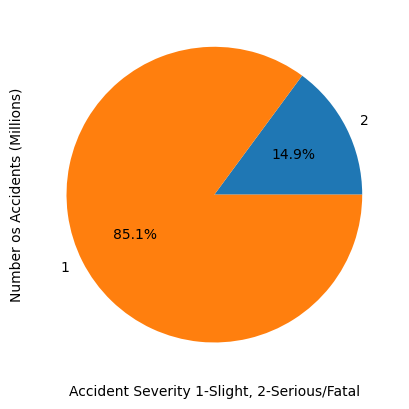

In [20]:
df['Accident_Severity'].value_counts()[df.Accident_Severity.unique()].plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=10)
plt.xlabel('Accident Severity 1-Slight, 2-Serious/Fatal')
plt.ylabel('Number os Accidents (Millions)')
plt.show()

Based on the visualization, it can be inferred that a substantial majority, approximately 85%, of accidents are categorized as "slight," while the remaining 15% of accidents are classified as "serious" or "fatal."

#II. TIME OF THE ACCIDENTS

### I. Accidents occured throught the Years

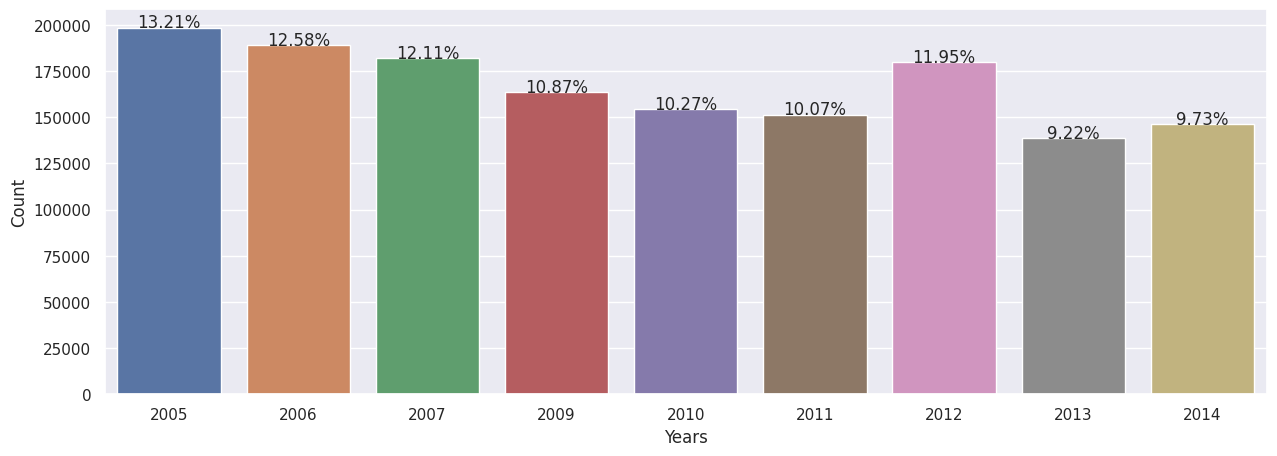

In [21]:
sns.set(style="darkgrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(15,5))
yearplot = sns.countplot(x='Year',data=df)
yearplot.set(xlabel='Years', ylabel='Count')
for p in yearplot.patches:
    height = p.get_height()
    yearplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data illustrates a discernible downward trend in accident rates as the years progress.

### II. Accidents happend on months

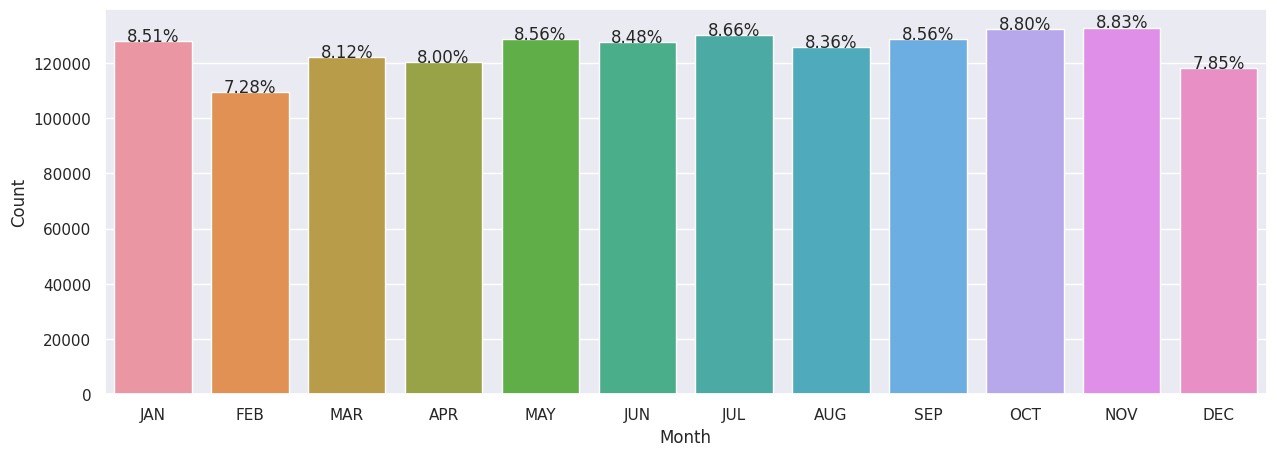

In [22]:
sns.set(style="darkgrid")                               #creating bar graph using seaborn
plt.figure(figsize=(15,5))
monthplot = sns.countplot(x='Month',data=df)
monthplot.set(xlabel='Month', ylabel='Count')
for p in monthplot.patches:
    height = p.get_height()
    monthplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
monthplot.set(xticklabels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

It's evident that the accident rates exhibit a relatively consistent pattern across all months.

### III. Accidents occured on days of week

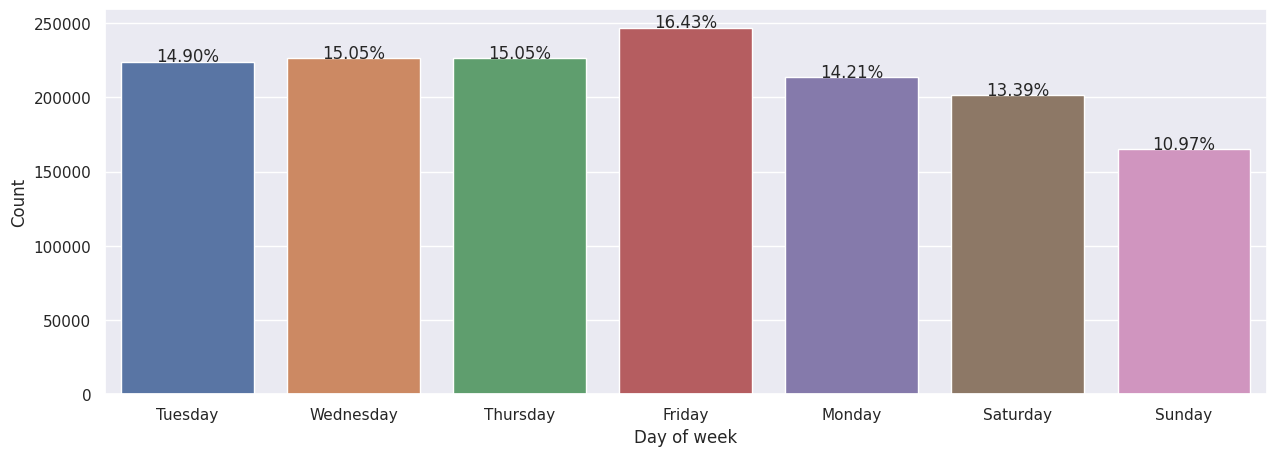

In [23]:
sns.set(style="darkgrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(15,5))
weekplot = sns.countplot(x='week_days',data=df)
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches:
    height = p.get_height()
    weekplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data reveals that Friday has the highest frequency of accidents, while Sunday consistently ranks as the day with the lowest occurrence.

### IV. Accidents based on day of month

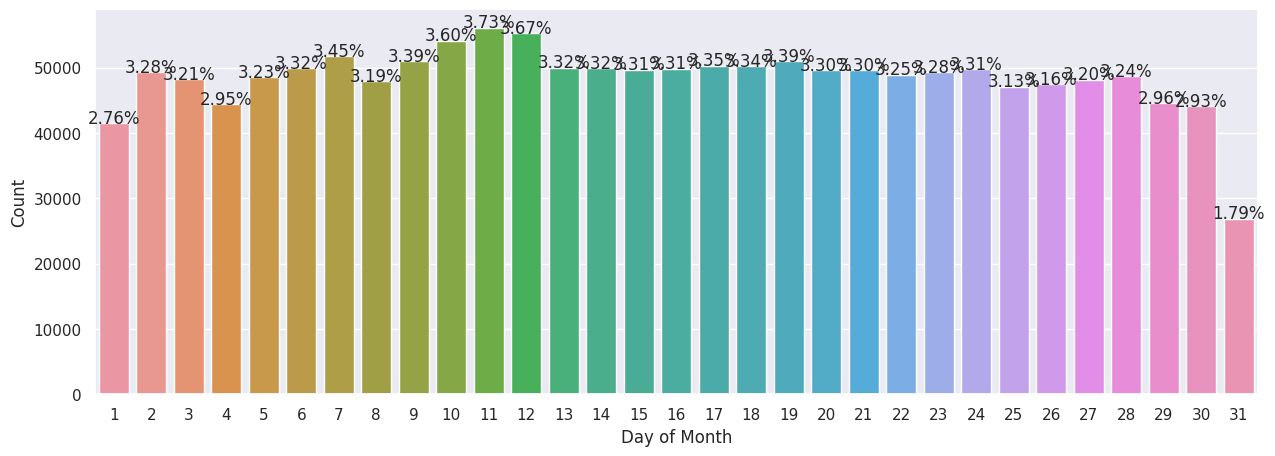

In [24]:
sns.set(style="darkgrid")                                   #creating bar graph using seaborn
plt.figure(figsize=(15,5))
monthplot = sns.countplot(x='Day of Month',data=df)
monthplot.set(xlabel='Day of Month', ylabel='Count')
for p in monthplot.patches:
    height = p.get_height()
    monthplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

This graph provides a reference for the distribution of accidents across different days of the month.

### V. Accidents based on time of the day

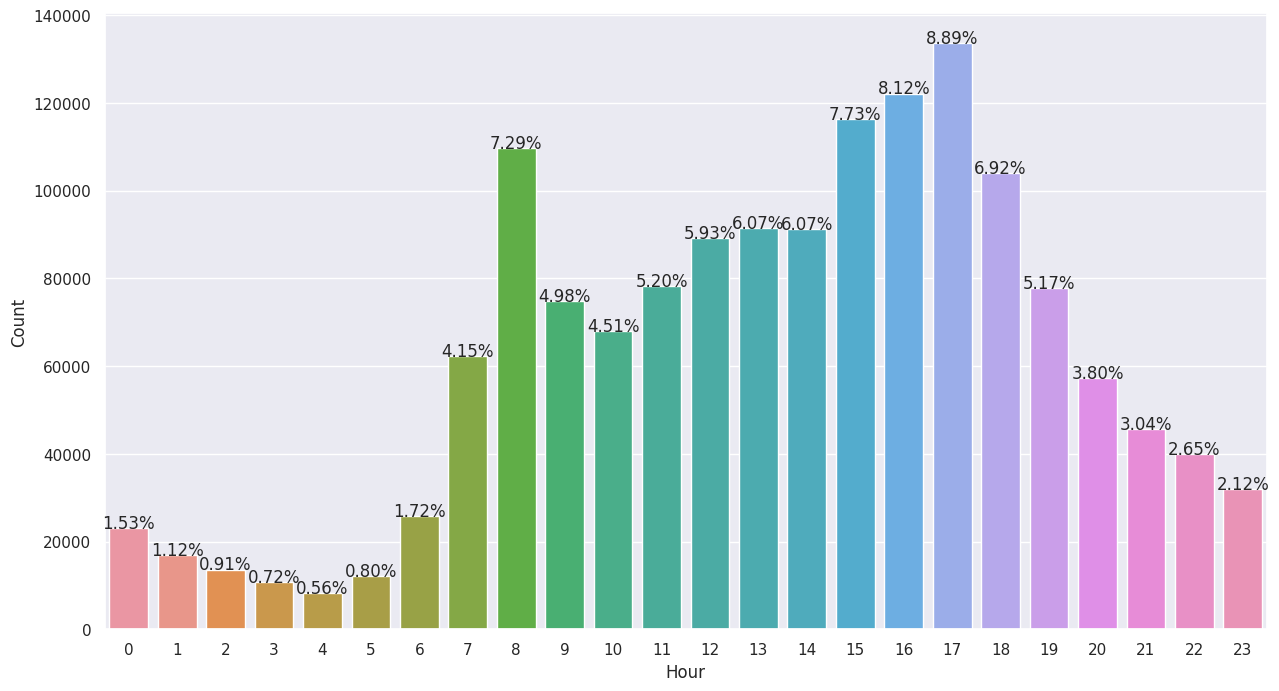

In [25]:
sns.set(style="darkgrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(15,8))
Hourplot = sns.countplot(x='Hour',data=df)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches:
    height = p.get_height()
    Hourplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

As evident from the data, the majority of accidents tend to coincide with peak hours during the day.

### Heatmap with the concentration of accidents by month over the years

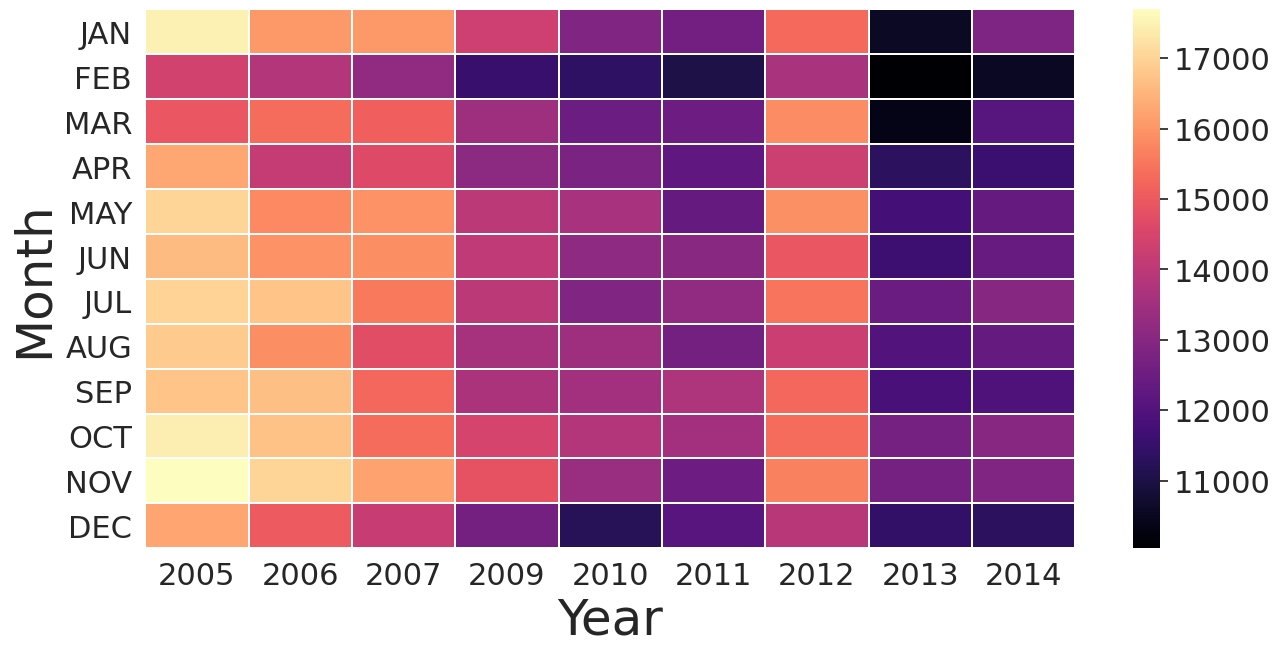

In [26]:
df['Ones']=1                                #creating heat map using seaborn
table = pd.pivot_table(df, values='Ones', index=['Month'],columns=['Year'], aggfunc=np.sum)
plt.figure(figsize=(15,7))
yticks = np.array(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
sns.set(rc={"axes.labelsize":36},font_scale=2)
sns.heatmap(table, yticklabels=yticks,linewidths=.1,annot=False,cmap='magma')
plt.show()

The heatmap's color intensity darkens as you progress through the years and months, indicating a decreasing trend in accident rates over time within each month.

## Accidents in different Weather Conditions

In [27]:
df_conditions = df[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions',]]

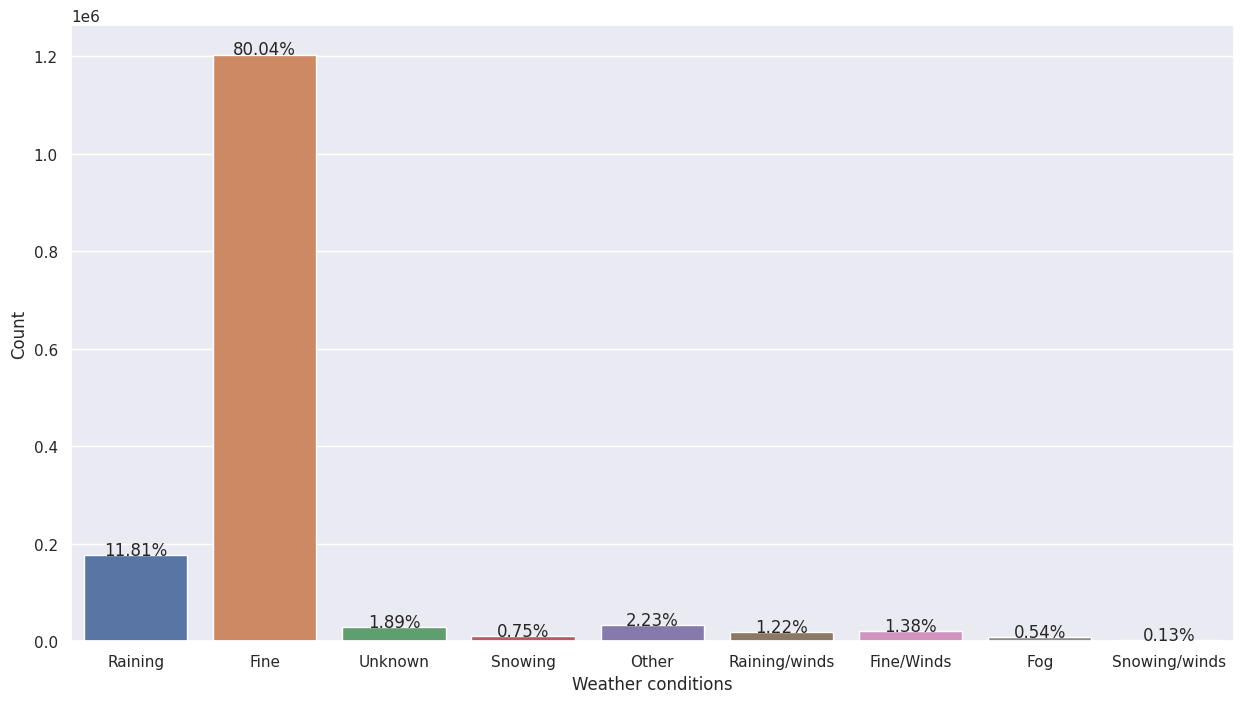

In [28]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,8))
weatherplot = sns.countplot(x='Weather_Conditions',data=df_conditions)
weatherplot.set(xlabel='Weather conditions', ylabel='Count',xticklabels=['Raining','Fine','Unknown','Snowing','Other','Raining/winds','Fine/Winds','Fog','Snowing/winds'])
for p in weatherplot.patches:
    height = p.get_height()
    weatherplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

Majority of the accidents are occured in Fine weather Conditions.

## Accidents in different Light Conditions

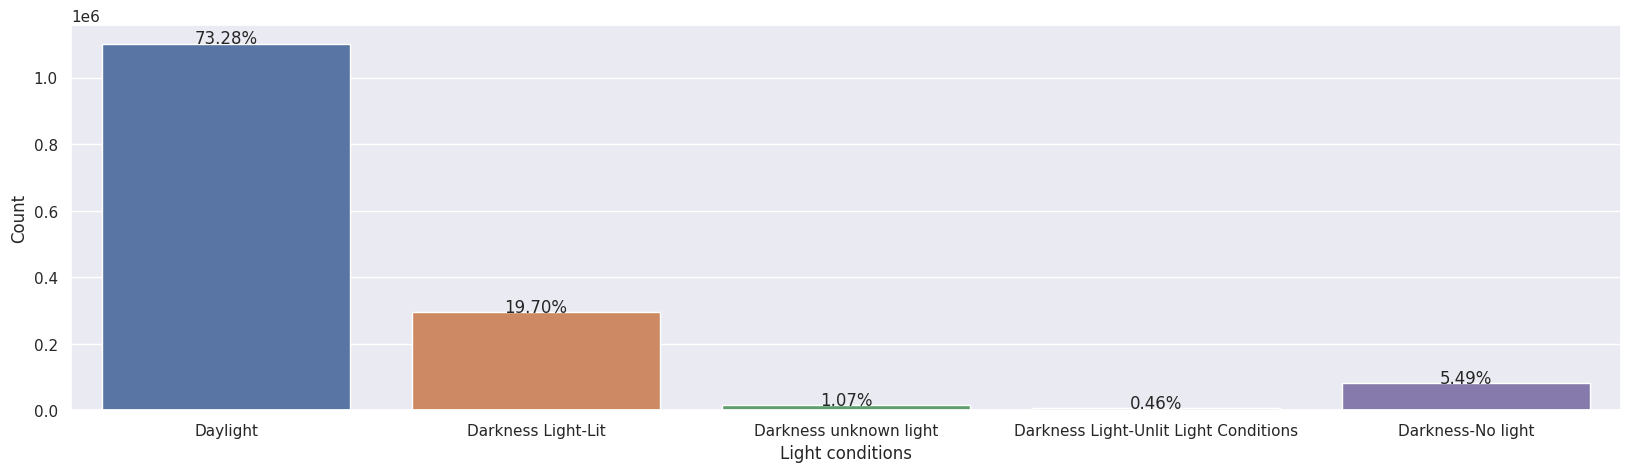

In [29]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(20,5))
lightplot = sns.countplot(x='Light_Conditions',data=df_conditions)
lightplot.set(xlabel='Light conditions', ylabel='Count',xticklabels=['Daylight','Darkness Light-Lit','Darkness unknown light','Darkness Light-Unlit Light Conditions','Darkness-No light'])
for p in lightplot.patches:
    height = p.get_height()
    lightplot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format((height/len(df))*100)+'%', ha="center")
plt.show()

The highest frequency of accidents takes place during daylight conditions which means.

## Accident occured by Road Surface Conditions

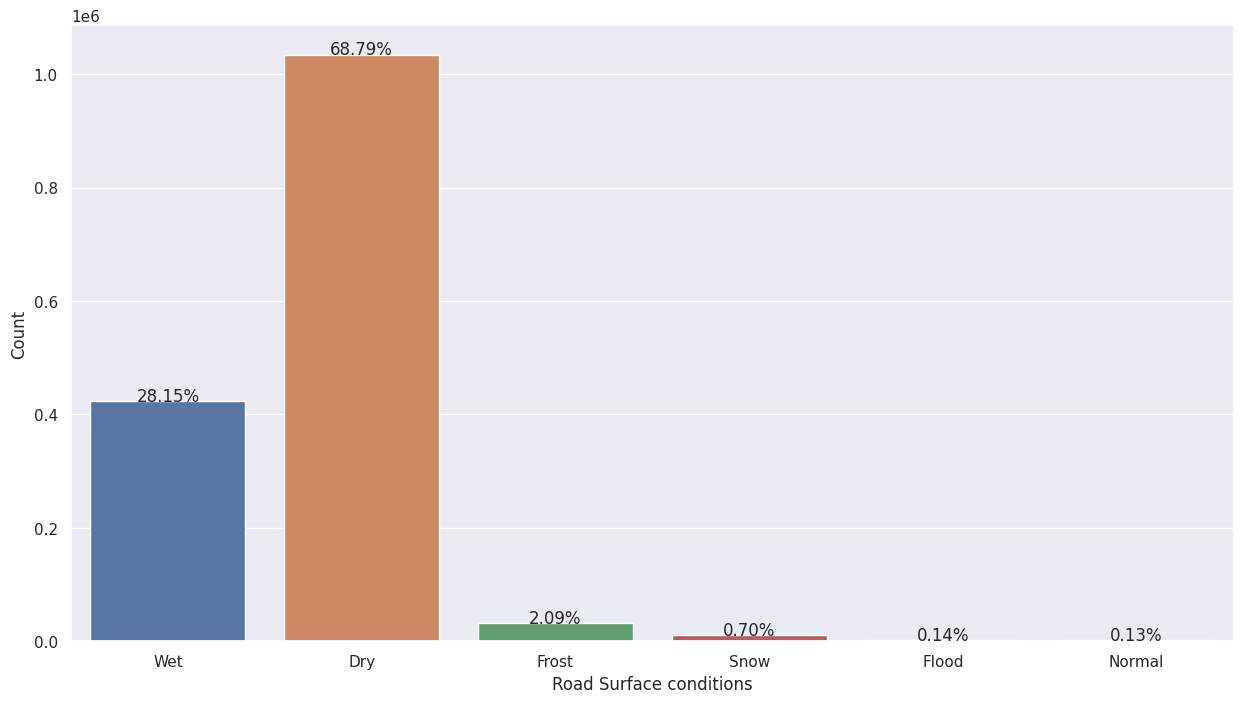

In [30]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,8))
roadplot = sns.countplot(x='Road_Surface_Conditions',data=df_conditions)
roadplot.set(xlabel='Road Surface conditions', ylabel='Count', xticklabels=['Wet','Dry','Frost','Snow','Flood','Normal'])
for p in roadplot.patches:
    height = p.get_height()
    roadplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

This graph provides a clear indication that various road surface conditions do not appear to be a significant contributing factor to accidents, as the majority of accidents occur on dry road surfaces.

## Accident in Urban or Rural Area

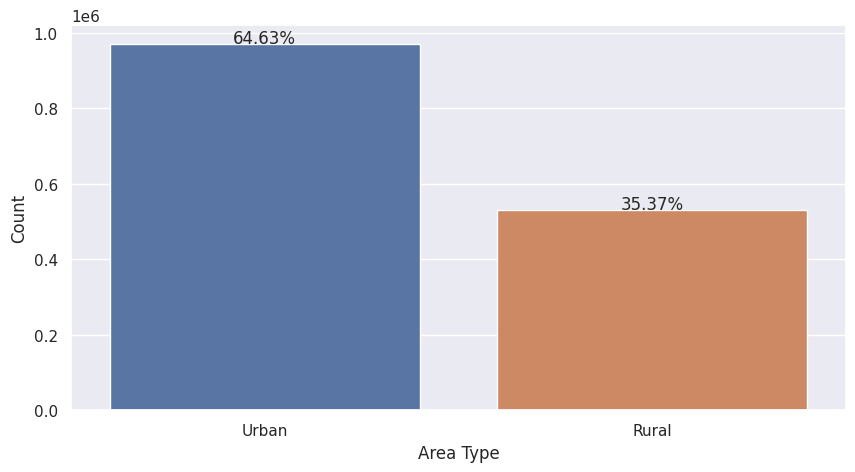

In [31]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(10,5))
areaplot = sns.countplot(x='area_type',data=df)
areaplot.set(xlabel='Area Type', ylabel='Count')
for p in areaplot.patches:
    height = p.get_height()
    areaplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

Two-thirds of all accidents transpire in urban areas, while the remaining one-third transpire in rural areas.

## Did Police Officer Attend Scene of Accident?

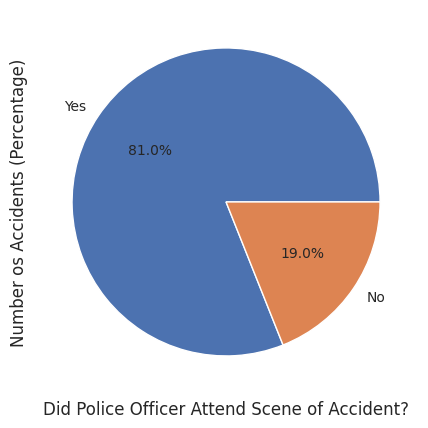

In [32]:
df_attend = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()                           #creating bar graph using seaborn
plt.figure(figsize=(5, 5))
df_attend.plot(kind='pie',autopct='%1.1f%%', startangle=0, fontsize=10)
plt.xlabel('Did Police Officer Attend Scene of Accident?')
plt.ylabel('Number os Accidents (Percentage)')
plt.show()

Over a span of ten years, approximately 80% of accidents underwent police investigation.

## Accidents on different road types.

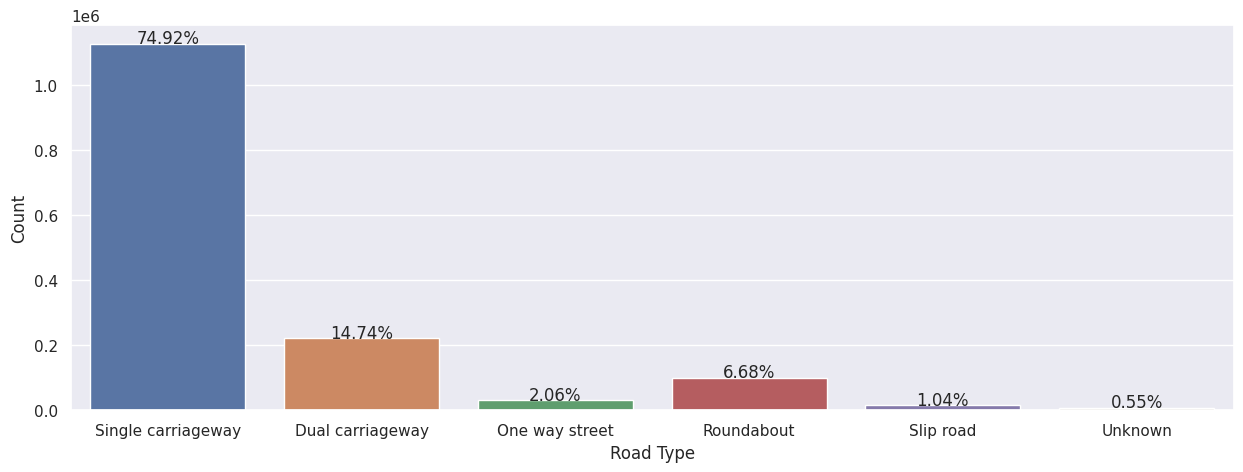

In [33]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,5))
areaplot = sns.countplot(x='Road_Type',data=df)
areaplot.set(xlabel='Road Type', ylabel='Count')
for p in areaplot.patches:
    height = p.get_height()
    areaplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The majority of accidents occurred on single carriageway roads.

## Accidents on different speed limits.

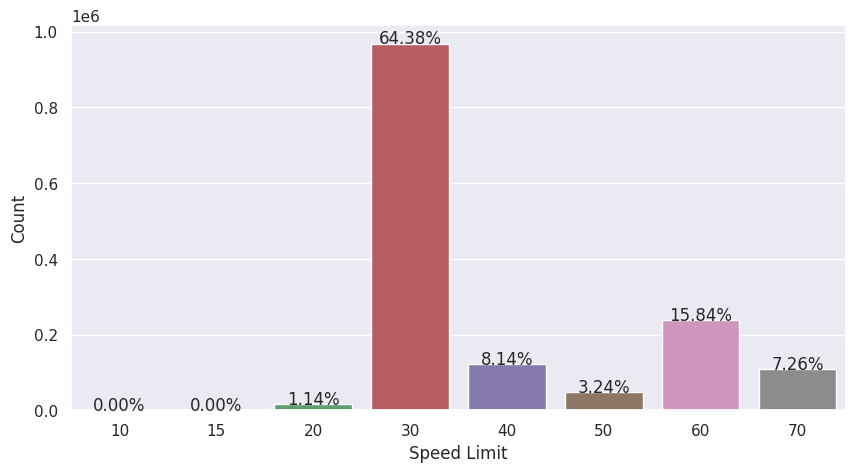

In [34]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(10,5))
areaplot = sns.countplot(x='Speed_limit',data=df)
areaplot.set(xlabel='Speed Limit', ylabel='Count')
for p in areaplot.patches:
    height = p.get_height()
    areaplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

Approximately 64%, of accidents occurred when the speed limit was set at 30. This suggests that adherence to or violations of this specific speed limit may play a crucial role in the occurrence of accidents.

#Accidents on different Junction Control.

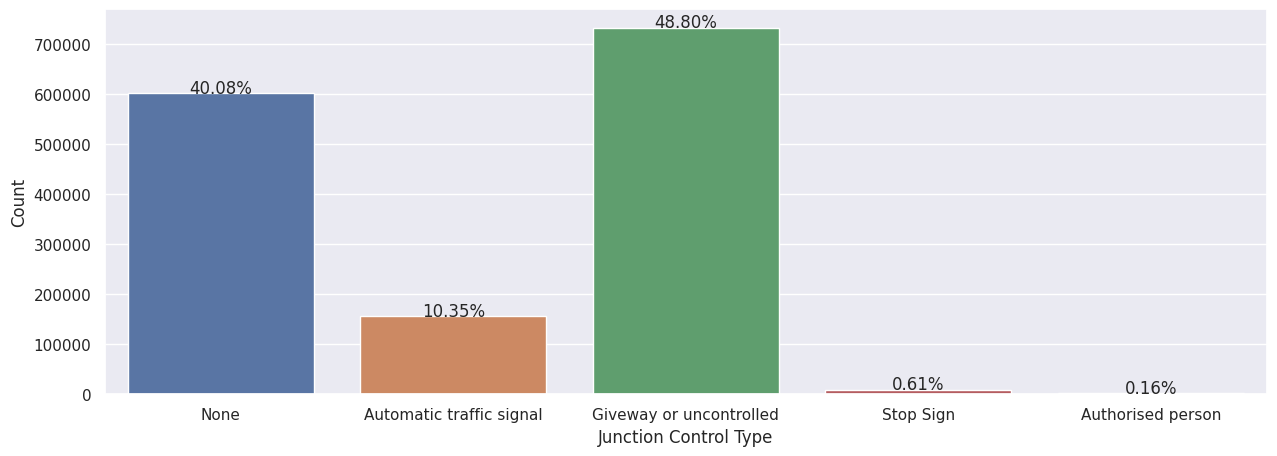

In [35]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,5))
areaplot = sns.countplot(x='Junction_Control',data=df)
areaplot.set(xlabel='Junction Control Type', ylabel='Count')
for p in areaplot.patches:
    height = p.get_height()
    areaplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data reveals that half of the accidents occurred at "give way" or "uncontrolled" junction control types, with "No junction control" contributing to 40% of these cases, and "traffic signal" accounting for 10% of the accidents.

## Accidents placed in UK

In [36]:
#fig = px.scatter_geo(df, lat='Latitude', lon='Longitude')
#fig.update_geos(projection_type="mercator", showcoastlines=True, coastlinecolor="Black",)
#fig.update_layout(geo=dict(showland=True,showrivers=True,),)
#fig.update_geos(projection_scale=15)
#fig.show()

In [37]:
#geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
#gdf = GeoDataFrame(df, geometry=geometry)
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#ax = world[(world.name == "United Kingdom")].plot(color='white', edgecolor='black')
#gdf.plot(ax=ax, color='red')
#plt.show()




#create a map
#this_map = folium.Map(prefer_canvas=True)

#def plotDot(point):
#    '''input: series that contains a numeric named latitude and a numeric named longitude
#    this function creates a CircleMarker and adds it to your this_map'''
#    folium.CircleMarker(location=[point.Latitude, point.Longitude],
#                        radius=2,
#                        weight=0).add_to(this_map)

#use df.apply(,axis=1) to iterate through every row in your dataframe
#df.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
#this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
#this_map.save(os.path.join('html_map_output/simple_dot_plot.html'))

#this_map


In [38]:
#lat = list(df["latitude"])
#lon = list(df["longitude"])

#m = folium.Map(location=[51.489096, -0.191170], zoom_start=13)

# Add markers to the map based on the DataFrame
#for index, row in df.iterrows():
#    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(m)

# Display the map
#m.save('map.html')  # Save the map to an HTML file
#m  # Display the map in a Jupyter Notebook (if you're using Jupyter)